In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [6]:
(ds_train_val, ds_test), ds_info = tfds.load(
    'cifar100',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

train_size = int(len(ds_train_val)*0.8)

ds_train = ds_train_val.take(train_size)
ds_train = ds_train.shuffle(buffer_size=train_size)
ds_val = ds_train_val.skip(train_size)

2024-09-11 23:35:46.491777: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


/home/cdagher/anaconda3/envs/tf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 1/1 [00:06<00:00,  5.60s/ url]

Dl Completed...: 100%|██████████| 1/1 [00:06<00:00,  6.47s/ url]
                                                                        

Dataset cifar100 downloaded and prepared to /home/cdagher/tensorflow_datasets/cifar100/3.0.2. Subsequent calls will reuse this data.


2024-09-11 23:36:14.212425: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-09-11 23:36:14.264038: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


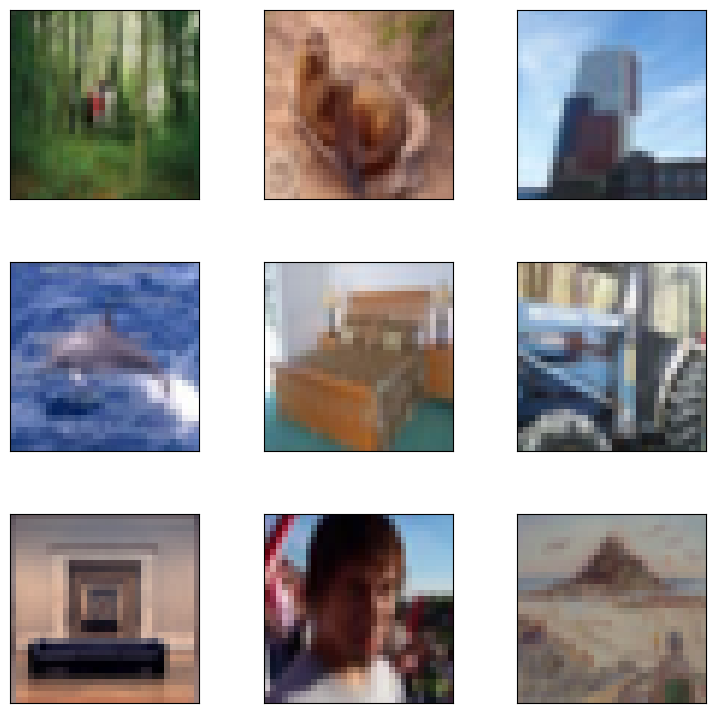

In [7]:
fig = tfds.show_examples(ds_train, ds_info)

In [8]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

def preprocess_mobilenet(image, label):
    image = tf.cast(image, tf.float32)
    image = preprocess_input(image)  # Apply MobileNetV2-specific preprocessing
    return image, label

def resize_img(image, label):
    return tf.image.resize(image, (224, 224)), label

ds_train = ds_train.map(preprocess_mobilenet)
ds_train = ds_train.map(resize_img)
ds_val = ds_val.map(preprocess_mobilenet)
ds_val = ds_val.map(resize_img)
ds_test = ds_test.map(preprocess_mobilenet)
ds_test = ds_test.map(resize_img)

BATCH_SIZE = 32

ds_train = ds_train.batch(BATCH_SIZE)
ds_val = ds_val.batch(BATCH_SIZE)
ds_test = ds_test.batch(BATCH_SIZE)

In [9]:
# Create a ModelCheckpoint callback to save the model every n epochs
checkpoint_callback = ModelCheckpoint(
    filepath='model_checkpoint_{epoch:02d}.keras',  # Filepath to save the model
    save_freq=2  # Save every 2 epochs
)

In [10]:
model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    alpha=1.0,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=100,
    classifier_activation='softmax'
)

In [11]:
optim = keras.optimizers.Adam(
    learning_rate=0.001
)

model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
EPOCHS = 50

history = model.fit(
    ds_train,
    epochs=EPOCHS,
    validation_data=ds_val
)

Epoch 1/50


2024-09-11 23:36:54.875271: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2207s 2s/step - accuracy: 0.0691 - loss: 4.1602 - val_accuracy: 0.0097 - val_loss: 6.6464
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2179s 2s/step - accuracy: 0.2098 - loss: 3.1518 - val_accuracy: 0.0109 - val_loss: 8.7186
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2187s 2s/step - accuracy: 0.3242 - loss: 2.5652 - val_accuracy: 0.0131 - val_loss: 8.1133
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2184s 2s/step - accuracy: 0.4107 - loss: 2.1751 - val_accuracy: 0.2312 - val_loss: 3.7180
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2185s 2s/step - accuracy: 0.4754 - loss: 1.8902 - val_accuracy: 0.1657 - val_loss: 5.8531
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2177s 2s/step - accuracy: 0.5319 - loss: 1.6576 - val_accuracy: 0.1894 - val_loss: 5.6260
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2250s 2s/step - accuracy: 0.5776 - loss: 1.4705 - val_accuracy: 0.2621 - val_loss: 4.5679
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2180s 2s/step - accuracy: 0.6147 - loss: 1.31

KeyboardInterrupt: 

In [13]:
test_loss, test_accuracy = model.evaluate(ds_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 97s 310ms/step - accuracy: 0.4358 - loss: 3.1244
Test Loss: 3.098137855529785
Test Accuracy: 0.43939998745918274
